In [26]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#importing the Iris dataset with pandas
dataset = pd.read_csv('Iris.csv')
x = dataset.iloc[:, [1, 2, 3, 4]].values
x_sepal = dataset.iloc[:, [1, 2]].values
x_graf = dataset.iloc[:, [0, 1, 2]].values
x_full = dataset.iloc[:, [1, 2, 3, 4, 5]].values

C:\Users\carlo\Anaconda3\lib\site-packages\tslearn\utils.py:63: UserWarning: 2-Dimensional data passed. Assuming these are 150 1-dimensional timeseries
  '{} 1-dimensional timeseries'.format(X.shape[0]))


GlobalAlignmentKernelKMeans(max_iter=50, n_clusters=3, n_init=20, n_jobs=None,
              random_state=0, sigma=2.1213203435596433, tol=1e-06,
              verbose=False)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 1 2 1 2 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1
 2 2 2 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 1 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
[[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0], [54.0, 56.0, 58.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 10

Text(0.5, 1.0, 'Kernel K-means')

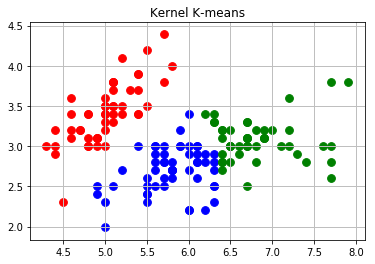

In [53]:
from tslearn.clustering import GlobalAlignmentKernelKMeans
from tslearn.metrics import sigma_gak
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

seed = 0
sz = x_sepal.shape[1]

gak_km = GlobalAlignmentKernelKMeans(n_clusters=3,
                                     sigma=sigma_gak(x_sepal),
                                     n_init=20,
                                     verbose=False,
                                     random_state=seed)
y_pred = gak_km.fit_predict(x_sepal)

print(gak_km)

#plt.figure()
#for yi in range(3):
#    plt.subplot(3, 1, 1 + yi)
#    for xx in x_sepal[y_pred == yi]:
#        plt.plot(xx.ravel(), "k-")
#    plt.xlim(0, 1)
#    plt.ylim(2, 8)
#    plt.title("Cluster %d" % (yi + 1))


k = []
f = []
u = []
matriz =[]

for y in range(len(y_pred)):
    if y_pred[y] == 0:
        k.append(x_graf[y,0])
    elif y_pred[y]==1:
        f.append(x_graf[y,0])
    elif y_pred[y]==2:
        u.append(x_graf[y,0])
        
        
print(y_pred)
matriz.append(k)
matriz.append(f)
matriz.append(u)
print(matriz)

#Visualising the clusters
plt.scatter(x_sepal[y_pred == 0, 0], x_sepal[y_pred == 0, 1], s = 60, c = 'red', label = 'Iris-versicolour')
plt.scatter(x_sepal[y_pred == 1, 0], x_sepal[y_pred == 1, 1], s = 60, c = 'blue', label = 'Iris-setosa')
plt.scatter(x_sepal[y_pred == 2, 0], x_sepal[y_pred == 2, 1], s = 60, c = 'green', label = 'Iris-virginica')


plt.grid(b=True, which='major', axis='both', color='0.75', linestyle='-', linewidth=1)
plt.title('Kernel K-means', fontdict=None, loc='center', pad=None)

#plt.legend()